In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import joblib

In [4]:
df = pd.read_csv('../data/processed/engineered_inventory.csv')

In [5]:
df.head()

,Unnamed: 0,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,...,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Sales_Percentage,ABC_Class,Demand_Trend,Peak_Month,Low_Month,Demand_Range,High_Low_Ratio
0,0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,...,10,537760,537760,0.050151,0.050151,266,Sep_Demand,Feb_Demand,755,1.185549
1,1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,...,100,5745300,6283060,0.585949,0.585949,262,Dec_Demand,Nov_Demand,534,1.118142
2,2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,...,2,3152,6286212,0.586243,0.586243,-40,Sep_Demand,May_Demand,372,25.799983
3,3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,...,2,22610,6308822,0.588352,0.588352,-433,Jan_Demand,Dec_Demand,433,1.608146
4,4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,...,10,198330,6507152,0.606847,0.606847,168,Feb_Demand,Oct_Demand,670,1.485156


In [6]:
df.columns

Index(['Unnamed: 0', 'Item_ID', 'Item_Name', 'Category', 'Jan_Demand',
       'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand',
       'Jul_Demand', 'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand',
       'Dec_Demand', 'Total_Annual_Units', 'Price_Per_Unit',
       'Total_Sales_Value', 'Cumulative_Sales', 'Cumulative_Sales_Percentage',
       'ABC_Class', 'Demand_Trend', 'Peak_Month', 'Low_Month', 'Demand_Range',
       'High_Low_Ratio'],
      dtype='object')

In [7]:
feature_cols = [
    'Price_Per_Unit','Demand_Trend','Demand_Range','High_Low_Ratio'
]

X = df[feature_cols]
y = df['Total_Annual_Units']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor()

model.fit(X_train,y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)

print(f"Model trained. Test MSE = {mse:.2f}")

Model trained. Test MSE = 2409551.83


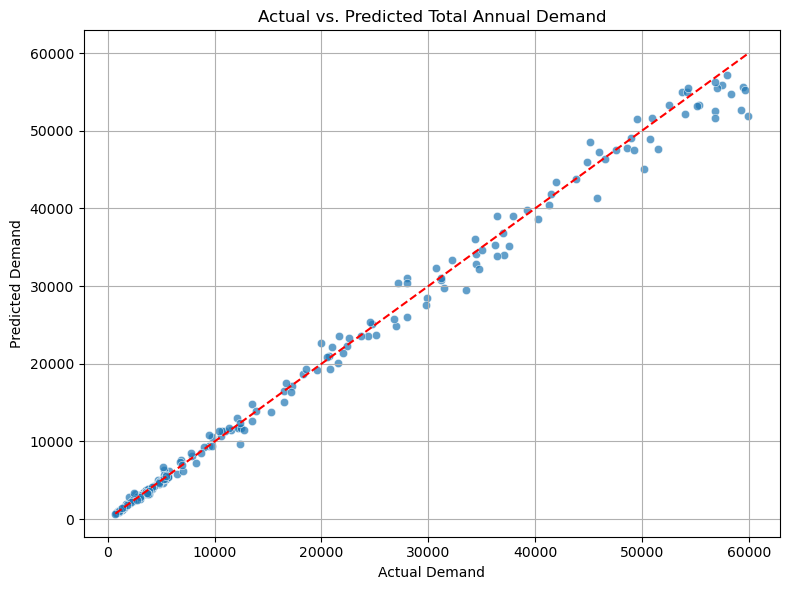

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Total Annual Demand')
plt.grid(True)
plt.tight_layout()
plt.savefig('../output/visuals/actual_vs_predicted.png')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6316\3474220009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


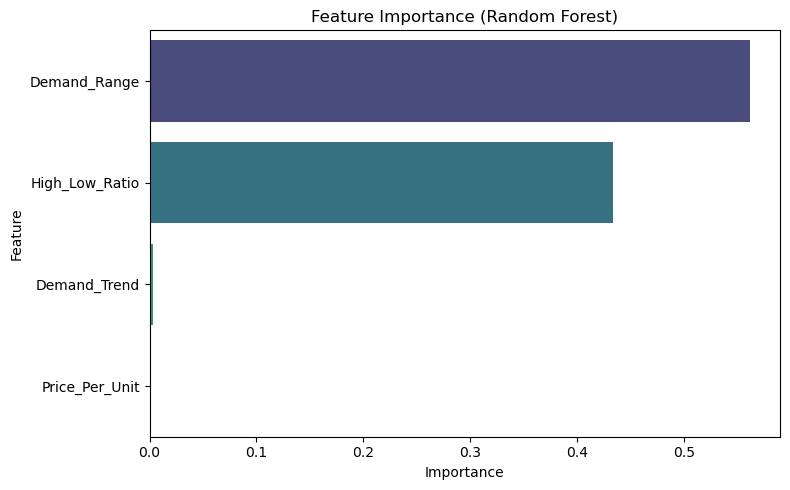

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.savefig('../output/visuals/feature_importance.png')
plt.show()


In [14]:
pred_df = pd.DataFrame({
    'Item_ID': df.iloc[y_test.index]['Item_ID'].values,
    'Actual_Annual_Demand': y_test.values,
    'Predicted_Annual_Demand': preds
})
pred_df.to_csv('../output/predictions/actual_vs_predicted.csv', index=False)


In [22]:
joblib.dump(model, ('../models/demand_predictor.pkl'))

['../models/demand_predictor.pkl']